Nayef Alzurayer

Probability and Statistics for Computer Science

##### The goal of this project is to analyze the average number of games a NHL player drafted has played based on the round he was drafted in. Using a dataset of NHL draft picks from 1963-2022, I will categorize the data by type and level of measurement, clean and prepare the data using Python and Pandas, and conduct statistical analysis to determine the probability of success for each draft round. This project aims to provide insights into the success rates of NHL draft picks and inform future draft strategies for teams.



In [5]:
import pandas as pd
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import scipy.stats as stats



In [24]:
df = pd.read_csv('nhldraft.csv')

df.drop(['id','goals','position','points','assists','point_shares', 'team', 'nationality', 'age', 'to_year', 'amateur_team', 'plus_minus', 'penalties_minutes', 'goalie_games_played', 'goalie_wins', 'goalie_losses', 'goalie_ties_overtime', 'save_percentage', 'goals_against_average'], axis=1, inplace=True)


teams_by_year = {
    1963: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1964: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1965: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1966: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins'],
    1967: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Oakland Seals'],
    1968: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Oakland Seals'],
    1969: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Oakland Seals'],
    1970: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres'],
    1971: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres'],
    1972: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders'],
    1973: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders'],
    1974: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Kansas City Scouts','Washington Capitals'],
    1975: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','California Golden Seals','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Kansas City Scouts','Washington Capitals'],
    1976: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Cleveland Barons','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals'],
    1977: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Cleveland Barons','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals'],
    1978: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals'],
    1979: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','Atlanta Flames','New York Islanders','Colorado Rockies','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers'],
    1980: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Colorado Rockies','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','Calgary Flame'],
    1981: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Colorado Rockies','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','Calgary Flame'],
    1982: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1983: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1984: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1985: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1986: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1987: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1988: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1989: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1990: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1991: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Calgary Flame'],
    1992: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Calgary Flame'],
    1993: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Minnesota North Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Calgary Flame'],
    1994: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Quebec Nordiques','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Calgary Flame'],
    1995: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Calgary Flame'],
    1996: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Hartford Whalers','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Phoenix Coyotes','Calgary Flame'],
    1997: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Phoenix Coyotes','Calgary Flame'],
    1998: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins''Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Phoenix Coyotes','Calgary Flame'],
    1999: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Phoenix Coyotes','Calgary Flame'],
    2000: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes''Minnesota Wild'],
    2001: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2002: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2003: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2004: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2005: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Mighty Ducks of Anaheim','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2006: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2007: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2008: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2009: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2010: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Atlanta Thrashers','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2011: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2012: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2013: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2014: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2015: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2016: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild'],
    2017: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2018: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2019: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2020: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],
    2021: ['Montreal Canadiens','Chicago Black Hawks','Toronto Maple Leafs','Detroit Red Wings','New York Rangers','Boston Bruins','Philadelphia Flyers','Los Angeles Kings','St. Louis Blues','Dallas Stars','Pittsburgh Penguins','Vancouver Canucks','Buffalo Sabres','New York Islanders','Washington Capitals','Colorado Avalanche','Edmonton Oilers','Winnipeg Jets','Carolina Hurricanes','New Jersey Devils','Ottawa Senators','Tampa Bay Lightning','Florida Panthers','Anaheim Ducks','Nashville Predators','Columbus Blue Jackets','Calgary Flame','Phoenix Coyotes','Minnesota Wild','Vegas Golden Knights'],

    

}
rounds_by_year = {
    1963: 4,
    1964: 4,
    1965: 2,
    1966: 4,
    1967: 3,
    1968: 3,
    1969: 10,
    1970: 14,
    1971: 15,
    1972: 11,
    1973: 12,
    1974: 25,
    1975: 18,
    1976: 15,
    1977: 17,
    1978: 22,
    1979: 6,
    1980: 10,
    1981: 11,
    1982: 12,
    1983: 12,
    1984: 12,
    1985: 12,
    1986: 12,
    1987: 12,
    1988: 12,
    1989: 12,
    1990: 12,
    1991: 12,
    1992: 11,
    1993: 11,
    1994: 11,
    1995: 9,
    1996: 9,
    1997: 9,
    1998: 9,
    1999: 9,
    2000: 9,
    2001: 9,
    2002: 9,
    2003: 9,
    2004: 9,
    2005: 7,
    2006: 7,
    2007: 7,
    2008: 7,
    2009: 7,
    2010: 7,
    2011: 7,
    2012: 7,
    2013: 7,
    2014: 7,
    2015: 7,
    2016: 7,
    2017: 7,
    2018: 7,
    2019: 7,
    2020: 7,
    2021: 7,
    2022: 7
        
}

def get_round(years, overall_picks, teams_by_year, rounds_by_year):
    rounds = []
    for year, overall_pick in zip(years, overall_picks):
        if year not in teams_by_year or year not in rounds_by_year:
            rounds.append(None)
            continue
        num_teams = len(teams_by_year[year])
        round_num = int((overall_pick) // num_teams)
        if round_num > rounds_by_year[year]:
            rounds.append(None)
        else:
            rounds.append(round_num)
    return rounds



In [13]:
df['rounds'] = get_round(df['year'].tolist(), df['overall_pick'].tolist(), teams_by_year, rounds_by_year)
df.dropna(inplace=True)
df = df.loc[df['rounds'] > 1]

df

,year,overall_pick,player,games_played,rounds
283,2021,60,Janis Moser,43.0,2.0
530,2020,84,Nicolas Daws,25.0,2.0
587,2020,141,Isaak Phillips,4.0,4.0
627,2020,181,Cole Reinhardt,1.0,6.0
647,2020,201,Adam Raska,5.0,6.0
...,...,...,...,...,...
12225,1964,21,Syl Apps,727.0,3.0
12226,1964,22,Moe L'Abbe,5.0,3.0
12227,1964,23,Jim Dorey,232.0,3.0
12245,1963,17,Jim McKenny,604.0,2.0


In [20]:
def get_play_probabilities(df, num_of_games=1):
    probabilities = []
    for round_num in range(2, int(df['rounds'].max()+1)):    
        ##for each round we're going to truncate the df so it returns only the data for that round.
        round_df = df.loc[df['rounds'] == round_num]
        enough_games_df = round_df.loc[df['games_played'] >= num_of_games]
        total_round_players = len(round_df)
        enough_games_players = len(enough_games_df)
        enough_games_liklihood = float(enough_games_players) / total_round_players
        probabilities.append((round_num, round(enough_games_liklihood, 2)))
    return probabilities
        
def get_average_games(df):
    averages = []
    for round_num in range(2, int(df['rounds'].max()+1)): 
        round_df = df.loc[df['rounds'] == round_num]
        round_avg = mean( round_df['games_played'].tolist() )
        averages.append((round_num, round( round_avg,2)))
    return averages
        
        
    

In [21]:
probability_df = pd.DataFrame(get_play_probabilities(df, num_of_games=25), columns = ['Round','Probability'])
probability_df

,Round,Probability
0,2,0.73
1,3,0.71
2,4,0.70
3,5,0.72
4,6,0.62
5,7,0.65
6,8,0.62
7,9,0.65
8,10,0.58
9,11,0.68


In [15]:
average_df = pd.DataFrame(get_average_games(df),columns = ['Round','Averages'])
average_df

,Round,Averages
0,2,261.95
1,3,246.82
2,4,195.02
3,5,253.95
4,6,211.64
5,7,216.73
6,8,226.45
7,9,212.88
8,10,192.34
9,11,230.95


Graphs for the functions

In my bar graph, I observed a negative correlation between draft round and the average number of games played in the NHL. This is because players drafted earlier tend to play more games as they are typically preferred by team managers. Although players drafted in later rounds are still talented, they may not be considered as important as those drafted earlier. The reason for the low average number of games played by players in round 12 is due to an incomplete dataset with a limited number of players, most of whom had played only a few games, resulting in an outlier in the average number of games played for that round.

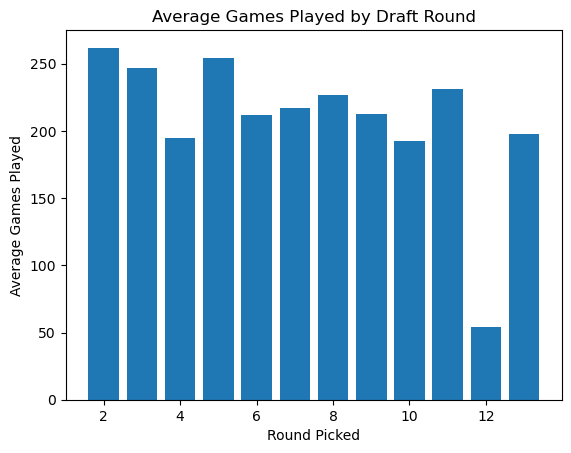

In [13]:
averages = get_average_games(df)
x = [item[0] for item in averages]
y = [item[1] for item in averages]

plt.bar(x,y)
plt.xlabel('Round Picked')
plt.ylabel('Average Games Played')
plt.title('Average Games Played by Draft Round')
plt.show()

Line Graph for probability for 25 games

The data indicates that the likelihood of playing at least 25 games per round selected is higher for players chosen in earlier rounds, with a steady decrease up to round 10. However, for later rounds, the data becomes more erratic and unpredictable. It is expected that players picked in later rounds would have a lower probability of playing in 25 games compared to those selected earlier. However, the incomplete dataset I used suggests that this deviation from expectations could be due to a small number of players in those later rounds, resulting in the average being either skewed up or down from its true value. It is possible that with more complete data, players picked after round 10 may indeed have a greater likelihood of playing in over 25 games than those picked earlier. Nevertheless, given our understanding of NHL drafting strategies, it is unlikely to be the case.

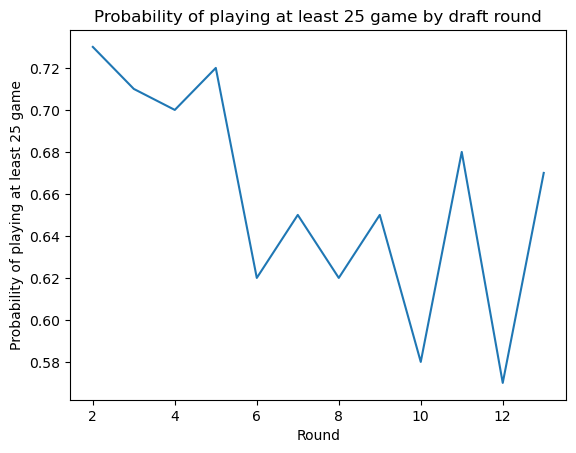

In [17]:
probabilities = get_play_probabilities(df,25)


x = [p[0] for p in probabilities]
y = [p[1] for p in probabilities]


plt.plot(x, y)


plt.xlabel('Round')
plt.ylabel('Probability of playing at least 25 game')
plt.title('Probability of playing at least 25 game by draft round')


plt.show()

Confidence Interval


From the available data, it is evident that earlier rounds have a higher confidence interval than the later rounds. This is because the earlier rounds have a larger sample size with more players, providing us with more reliable conclusions. However, for NHL draft years with less than 10 rounds, and for those rounds where the dataset has limited players, the margin of error becomes very wide. The lower bounds of Rounds 12 and 13, in particular, extend into negative values. While this is impractical from a real-world perspective since a player cannot play a negative number of games, mathematically, it is the result of a small sample size and low mean while calculating the confidence interval.

In [23]:
for round_num in range(2, int(df['rounds'].max()+1)):
    round_df = df.loc[df['rounds'] == round_num]
    games_played = round_df['games_played']
    mean = round(games_played.mean(), 2)
    std_error = stats.sem(games_played)
    confidence_interval = stats.t.interval(0.95, len(games_played)-1, loc=mean, scale=std_error)
    confidence_interval = tuple(round(ci, 2) for ci in confidence_interval)
    print(f"95% Confidence Interval for Round {round_num} Mean Games Played: {confidence_interval}")



95% Confidence Interval for Round 2 Mean Games Played: (239.0, 284.9)
95% Confidence Interval for Round 3 Mean Games Played: (222.45, 271.19)
95% Confidence Interval for Round 4 Mean Games Played: (170.91, 219.13)
95% Confidence Interval for Round 5 Mean Games Played: (223.99, 283.91)
95% Confidence Interval for Round 6 Mean Games Played: (180.17, 243.11)
95% Confidence Interval for Round 7 Mean Games Played: (178.62, 254.84)
95% Confidence Interval for Round 8 Mean Games Played: (182.24, 270.66)
95% Confidence Interval for Round 9 Mean Games Played: (166.12, 259.64)
95% Confidence Interval for Round 10 Mean Games Played: (129.87, 254.81)
95% Confidence Interval for Round 11 Mean Games Played: (131.24, 330.66)
95% Confidence Interval for Round 12 Mean Games Played: (-23.36, 131.08)
95% Confidence Interval for Round 13 Mean Games Played: (-78.82, 473.82)
